In [682]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [683]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Import The Data***

In [684]:
df1=pd.read_csv("/content/drive/MyDrive/Copy of train_file.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.



In [685]:
df1.head()

ID  LICENSE ID  ACCOUNT NUMBER  SITE NUMBER  \
0    35342-20020816     1256593           32811            1   
1  1358463-20051116     1639294          262311           29   
2  1980233-20090722     1980233          345008            1   
3  1476582-20040211     1476582          273121            1   
4  1141408-20080516     1896750          213785            1   

                     LEGAL NAME        DOING BUSINESS AS NAME  \
0                  CARMEN CAHUE         CLAUDIA'S BRIDAL SHOP   
1           ISLA TROPICAL, INC.                 ISLA TROPICAL   
2                DJS REMODELING          DJS REMODELING, INC.   
3      ALL-BRY CONSTRUCTION CO.      ALL-BRY CONSTRUCTION CO.   
4  MCDONOUGH MECHANICAL SERVICE  MCDONOUGH MECHANICAL SERVICE   

                      ADDRESS      CITY STATE ZIP CODE  ...  \
0  2625 S CENTRAL PARK AVE  1   CHICAGO    IL  60623.0  ...   
1         2825 W MONTROSE AVE   CHICAGO    IL    60618  ...   
2           1605  CLAVEY RD 1  HIGHLAND    IL    60035  ...   
3              8  NORTH TRAIL    LEMONT    IL    60439  ...   
4             4081  JOSEPH DR  WAUKEGAN    IL    60087  ...   

   LICENSE TERM START DATE  LICENSE TERM EXPIRATION DATE  \
0      2002-08-16T00:00:00           2003-08-15T00:00:00   
1      2005-11-16T00:00:00           2006-11-15T00:00:00   
2      2009-07-22T00:00:00           2011-07-15T00:00:00   
3      2004-02-11T00:00:00           2005-02-15T00:00:00   
4      2008-05-16T00:00:00           2010-05-15T00:00:00   

  LICENSE APPROVED FOR ISSUANCE          DATE ISSUED  \
0           2002-08-21T00:00:00  2006-04-11T00:00:00   
1           2006-04-05T00:00:00  2006-06-12T00:00:00   
2           2009-07-22T00:00:00  2009-07-22T00:00:00   
3           2004-02-10T00:00:00  2004-02-11T00:00:00   
4           2008-06-04T00:00:00  2008-06-05T00:00:00   

   LICENSE STATUS CHANGE DATE   SSA   LATITUDE  LONGITUDE  \
0                         NaN  25.0  41.843613 -87.714618   
1         2006-06-15T00:00:00  60.0  41.961132 -87.699626   
2                         NaN   NaN        NaN        NaN   
3                         NaN   NaN        NaN        NaN   
4                         NaN   NaN        NaN        NaN   

                                            LOCATION LICENSE STATUS  
0  {'latitude': '41.843612879431845', 'longitude'...            AAI  
1  {'latitude': '41.96113244107215', 'longitude':...            AAC  
2                                                NaN            AAI  
3                                                NaN            AAI  
4                                                NaN            AAI  

[5 rows x 32 columns]

In [686]:
df2=pd.read_csv("/content/drive/MyDrive/Copy of test_file.csv")

In [687]:
df2.head()

ID  LICENSE ID  ACCOUNT NUMBER  SITE NUMBER  \
0  1516615-20120216     2132209          280120            1   
1    69813-20110616     2090759           65043            1   
2  1519227-20041116     1541990          281270            1   
3  1922025-20100816     2041053          335243            1   
4  1675683-20070816     1837158          283018            3   

               LEGAL NAME DOING BUSINESS AS NAME                   ADDRESS  \
0          RS HOMES I LLC         RS HOMES I LLC    350 W HUBBARD ST 3 300   
1      CSX INTERMODAL INC         CSX INTERMODAL        2101 W 59TH ST 1ST   
2   LOCOMIBILE  LOFTS LLC   LOCOMOBILE LOFTS LLC     1133 S WABASH AVE 1ST   
3         ANNA F. JAMISON        ANNA F. JAMISON  13156 S FORRESTVILLE AVE   
4  MARINCA A. COVARRUBIAS                DETAILS         4208 S ARCHER AVE   

      CITY STATE  ZIP CODE  ...  CONDITIONAL APPROVAL  \
0  CHICAGO    IL   60610.0  ...                     N   
1  CHICAGO    IL   60636.0  ...                     N   
2  CHICAGO    IL   60605.0  ...                     N   
3  CHICAGO    IL   60827.0  ...                     N   
4  CHICAGO    IL   60632.0  ...                     N   

   LICENSE TERM START DATE LICENSE TERM EXPIRATION DATE  \
0      2012-02-16T00:00:00          2014-02-15T00:00:00   
1      2011-06-16T00:00:00          2013-06-15T00:00:00   
2      2004-11-16T00:00:00          2005-11-15T00:00:00   
3      2010-08-16T00:00:00          2012-08-15T00:00:00   
4      2007-08-16T00:00:00          2009-06-15T00:00:00   

   LICENSE APPROVED FOR ISSUANCE          DATE ISSUED  \
0            2012-01-19T00:00:00  2012-01-20T00:00:00   
1            2012-11-02T00:00:00  2012-11-05T00:00:00   
2            2004-12-06T00:00:00  2004-12-07T00:00:00   
3                            NaN  2010-11-04T00:00:00   
4            2007-08-15T00:00:00  2007-08-16T00:00:00   

  LICENSE STATUS CHANGE DATE   SSA   LATITUDE  LONGITUDE  \
0        2012-12-29T00:00:00   NaN  41.890047 -87.637467   
1        2012-12-29T00:00:00   NaN  41.786485 -87.676665   
2                        NaN   NaN  41.868269 -87.625695   
3        2012-12-31T00:00:00   NaN  41.655762 -87.608686   
4        2008-03-26T00:00:00  39.0  41.816969 -87.699785   

                                            LOCATION  
0  {'latitude': '41.89004724888915', 'longitude':...  
1  {'latitude': '41.786485235679486', 'longitude'...  
2  {'latitude': '41.86826924843568', 'longitude':...  
3  {'latitude': '41.65576175146191', 'longitude':...  
4  {'latitude': '41.81696910012824', 'longitude':...  

[5 rows x 31 columns]

# ***Analyse The Data***

In [688]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 32 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 85895 non-null  object 
 1   LICENSE ID                         85895 non-null  int64  
 2   ACCOUNT NUMBER                     85895 non-null  int64  
 3   SITE NUMBER                        85895 non-null  int64  
 4   LEGAL NAME                         85895 non-null  object 
 5   DOING BUSINESS AS NAME             85894 non-null  object 
 6   ADDRESS                            85895 non-null  object 
 7   CITY                               85895 non-null  object 
 8   STATE                              85895 non-null  object 
 9   ZIP CODE                           85864 non-null  object 
 10  WARD                               36194 non-null  float64
 11  PRECINCT                           29194 non-null  flo

In [689]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   ID                                 57239 non-null  object 
 1   LICENSE ID                         57239 non-null  int64  
 2   ACCOUNT NUMBER                     57239 non-null  int64  
 3   SITE NUMBER                        57239 non-null  int64  
 4   LEGAL NAME                         57239 non-null  object 
 5   DOING BUSINESS AS NAME             57237 non-null  object 
 6   ADDRESS                            57239 non-null  object 
 7   CITY                               57239 non-null  object 
 8   STATE                              57239 non-null  object 
 9   ZIP CODE                           57227 non-null  float64
 10  WARD                               56613 non-null  float64
 11  PRECINCT                           55661 non-null  flo

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



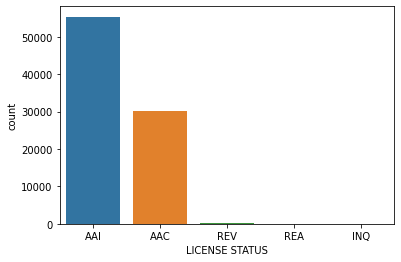

In [690]:
sns.countplot(df1['LICENSE STATUS'])

In [691]:
df1.isnull().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [692]:
df2.isnull().sum()


ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [693]:
for col in df1.columns:
  print(col)
  k= df1[col]
  
  print(k)

ID
0          35342-20020816
1        1358463-20051116
2        1980233-20090722
3        1476582-20040211
4        1141408-20080516
               ...       
85890      12652-20120516
85891    1821421-20070522
85892      74137-20090116
85893    2049545-20111016
85894    1070196-20040216
Name: ID, Length: 85895, dtype: object
LICENSE ID
0        1256593
1        1639294
2        1980233
3        1476582
4        1896750
          ...   
85890    2143400
85891    1821421
85892    1939358
85893    2110060
85894    1461628
Name: LICENSE ID, Length: 85895, dtype: int64
ACCOUNT NUMBER
0         32811
1        262311
2        345008
3        273121
4        213785
          ...  
85890      8011
85891    317725
85892      8458
85893      2156
85894    205936
Name: ACCOUNT NUMBER, Length: 85895, dtype: int64
SITE NUMBER
0         1
1        29
2         1
3         1
4         1
         ..
85890     1
85891     1
85892     2
85893    43
85894     1
Name: SITE NUMBER, Length: 85895, dtype: in

<function matplotlib.pyplot.plot>

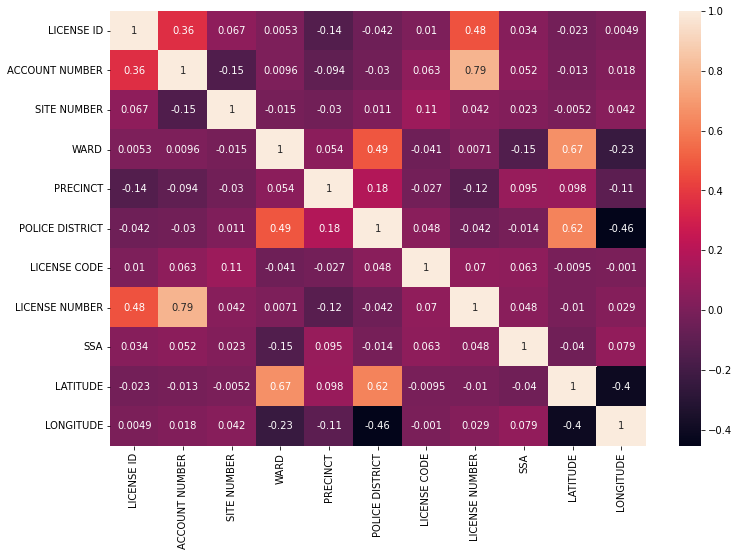

In [694]:

plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True)
plt.plot

<function matplotlib.pyplot.plot>

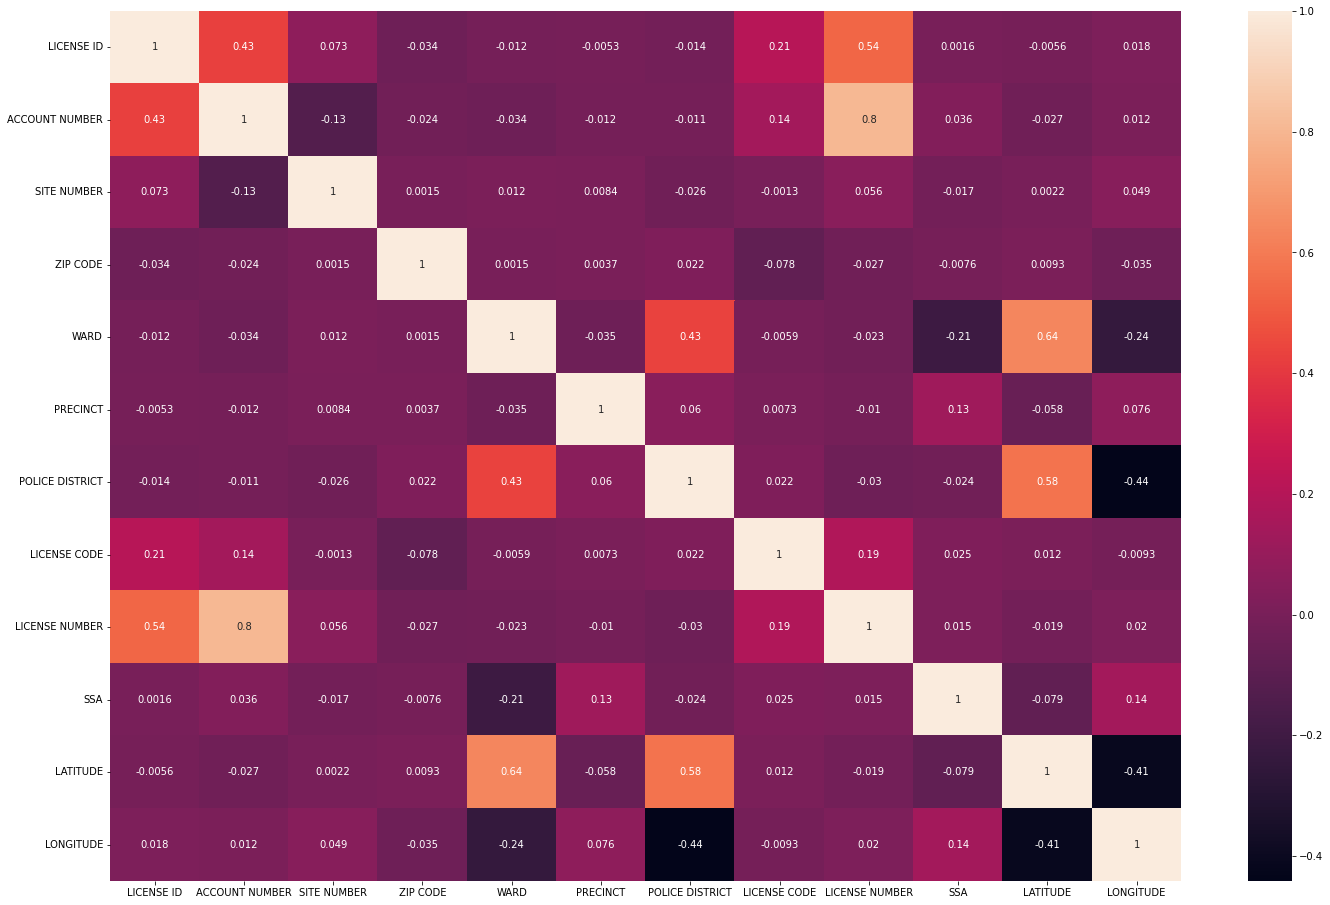

In [695]:
plt.figure(figsize=(24,16))
sns.heatmap(df2.corr(),annot=True)
plt.plot

# ***Preprocessing***

In [696]:
dropcol=["ID",'ADDRESS',"LICENSE ID"]
df1.drop(dropcol,axis=1,inplace=True)
df2.drop(dropcol,axis=1,inplace=True)

In [697]:
df1.head()

ACCOUNT NUMBER  SITE NUMBER                    LEGAL NAME  \
0           32811            1                  CARMEN CAHUE   
1          262311           29           ISLA TROPICAL, INC.   
2          345008            1                DJS REMODELING   
3          273121            1      ALL-BRY CONSTRUCTION CO.   
4          213785            1  MCDONOUGH MECHANICAL SERVICE   

         DOING BUSINESS AS NAME      CITY STATE ZIP CODE  WARD  PRECINCT  \
0         CLAUDIA'S BRIDAL SHOP   CHICAGO    IL  60623.0  22.0      28.0   
1                 ISLA TROPICAL   CHICAGO    IL    60618  33.0      23.0   
2          DJS REMODELING, INC.  HIGHLAND    IL    60035   NaN       NaN   
3      ALL-BRY CONSTRUCTION CO.    LEMONT    IL    60439   NaN       NaN   
4  MCDONOUGH MECHANICAL SERVICE  WAUKEGAN    IL    60087   NaN       NaN   

  WARD PRECINCT  ...  LICENSE TERM START DATE  LICENSE TERM EXPIRATION DATE  \
0         22-28  ...      2002-08-16T00:00:00           2003-08-15T00:00:00   
1         33-23  ...      2005-11-16T00:00:00           2006-11-15T00:00:00   
2           NaN  ...      2009-07-22T00:00:00           2011-07-15T00:00:00   
3           NaN  ...      2004-02-11T00:00:00           2005-02-15T00:00:00   
4           NaN  ...      2008-05-16T00:00:00           2010-05-15T00:00:00   

  LICENSE APPROVED FOR ISSUANCE          DATE ISSUED  \
0           2002-08-21T00:00:00  2006-04-11T00:00:00   
1           2006-04-05T00:00:00  2006-06-12T00:00:00   
2           2009-07-22T00:00:00  2009-07-22T00:00:00   
3           2004-02-10T00:00:00  2004-02-11T00:00:00   
4           2008-06-04T00:00:00  2008-06-05T00:00:00   

  LICENSE STATUS CHANGE DATE   SSA   LATITUDE  LONGITUDE  \
0                        NaN  25.0  41.843613 -87.714618   
1        2006-06-15T00:00:00  60.0  41.961132 -87.699626   
2                        NaN   NaN        NaN        NaN   
3                        NaN   NaN        NaN        NaN   
4                        NaN   NaN        NaN        NaN   

                                            LOCATION LICENSE STATUS  
0  {'latitude': '41.843612879431845', 'longitude'...            AAI  
1  {'latitude': '41.96113244107215', 'longitude':...            AAC  
2                                                NaN            AAI  
3                                                NaN            AAI  
4                                                NaN            AAI  

[5 rows x 29 columns]

In [698]:
df2.head()

ACCOUNT NUMBER  SITE NUMBER              LEGAL NAME DOING BUSINESS AS NAME  \
0          280120            1          RS HOMES I LLC         RS HOMES I LLC   
1           65043            1      CSX INTERMODAL INC         CSX INTERMODAL   
2          281270            1   LOCOMIBILE  LOFTS LLC   LOCOMOBILE LOFTS LLC   
3          335243            1         ANNA F. JAMISON        ANNA F. JAMISON   
4          283018            3  MARINCA A. COVARRUBIAS                DETAILS   

      CITY STATE  ZIP CODE  WARD  PRECINCT WARD PRECINCT  ...  \
0  CHICAGO    IL   60610.0  42.0      67.0         42-67  ...   
1  CHICAGO    IL   60636.0  16.0       5.0          16-5  ...   
2  CHICAGO    IL   60605.0   4.0       8.0           4-8  ...   
3  CHICAGO    IL   60827.0   9.0      33.0          9-33  ...   
4  CHICAGO    IL   60632.0  15.0      26.0         15-26  ...   

   CONDITIONAL APPROVAL  LICENSE TERM START DATE LICENSE TERM EXPIRATION DATE  \
0                     N      2012-02-16T00:00:00          2014-02-15T00:00:00   
1                     N      2011-06-16T00:00:00          2013-06-15T00:00:00   
2                     N      2004-11-16T00:00:00          2005-11-15T00:00:00   
3                     N      2010-08-16T00:00:00          2012-08-15T00:00:00   
4                     N      2007-08-16T00:00:00          2009-06-15T00:00:00   

   LICENSE APPROVED FOR ISSUANCE          DATE ISSUED  \
0            2012-01-19T00:00:00  2012-01-20T00:00:00   
1            2012-11-02T00:00:00  2012-11-05T00:00:00   
2            2004-12-06T00:00:00  2004-12-07T00:00:00   
3                            NaN  2010-11-04T00:00:00   
4            2007-08-15T00:00:00  2007-08-16T00:00:00   

  LICENSE STATUS CHANGE DATE   SSA   LATITUDE  LONGITUDE  \
0        2012-12-29T00:00:00   NaN  41.890047 -87.637467   
1        2012-12-29T00:00:00   NaN  41.786485 -87.676665   
2                        NaN   NaN  41.868269 -87.625695   
3        2012-12-31T00:00:00   NaN  41.655762 -87.608686   
4        2008-03-26T00:00:00  39.0  41.816969 -87.699785   

                                            LOCATION  
0  {'latitude': '41.89004724888915', 'longitude':...  
1  {'latitude': '41.786485235679486', 'longitude'...  
2  {'latitude': '41.86826924843568', 'longitude':...  
3  {'latitude': '41.65576175146191', 'longitude':...  
4  {'latitude': '41.81696910012824', 'longitude':...  

[5 rows x 28 columns]

In [699]:
df2.columns

Index(['ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME', 'DOING BUSINESS AS NAME',
       'CITY', 'STATE', 'ZIP CODE', 'WARD', 'PRECINCT', 'WARD PRECINCT',
       'POLICE DISTRICT', 'LICENSE CODE', 'LICENSE DESCRIPTION',
       'LICENSE NUMBER', 'APPLICATION TYPE', 'APPLICATION CREATED DATE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION'],
      dtype='object')

In [700]:
dates=["LICENSE TERM START DATE","LICENSE TERM EXPIRATION DATE","LICENSE APPROVED FOR ISSUANCE","DATE ISSUED","LICENSE STATUS CHANGE DATE","APPLICATION CREATED DATE",'APPLICATION REQUIREMENTS COMPLETE',"PAYMENT DATE"]

In [701]:
for i in dates:
  df1[i]=pd.to_datetime(df1[i])
  df2[i]=pd.to_datetime(df2[i])

In [702]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ACCOUNT NUMBER                     85895 non-null  int64         
 1   SITE NUMBER                        85895 non-null  int64         
 2   LEGAL NAME                         85895 non-null  object        
 3   DOING BUSINESS AS NAME             85894 non-null  object        
 4   CITY                               85895 non-null  object        
 5   STATE                              85895 non-null  object        
 6   ZIP CODE                           85864 non-null  object        
 7   WARD                               36194 non-null  float64       
 8   PRECINCT                           29194 non-null  float64       
 9   WARD PRECINCT                      36195 non-null  object        
 10  POLICE DISTRICT                   

In [703]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   ACCOUNT NUMBER                     57239 non-null  int64         
 1   SITE NUMBER                        57239 non-null  int64         
 2   LEGAL NAME                         57239 non-null  object        
 3   DOING BUSINESS AS NAME             57237 non-null  object        
 4   CITY                               57239 non-null  object        
 5   STATE                              57239 non-null  object        
 6   ZIP CODE                           57227 non-null  float64       
 7   WARD                               56613 non-null  float64       
 8   PRECINCT                           55661 non-null  float64       
 9   WARD PRECINCT                      56623 non-null  object        
 10  POLICE DISTRICT                   

In [704]:
df1["PAYMENT YEAR"]=df1["PAYMENT DATE"].apply(lambda x:x.year)

In [705]:
df2["PAYMENT YEAR"]=df2["PAYMENT DATE"].apply(lambda x:x.year)
df1["APPLICATION CREATED YEAR"]=df1["APPLICATION CREATED DATE"].apply(lambda x:x.year)
df2["APPLICATION CREATED YEAR"]=df2["APPLICATION CREATED DATE"].apply(lambda x:x.year)

In [706]:
df1["APPLICATION REQUIREMENTS COMPLETE YEAR"]=df1["APPLICATION REQUIREMENTS COMPLETE"].apply(lambda x:x.year)
df2["APPLICATION REQUIREMENTS COMPLETE YEAR"]=df2["APPLICATION REQUIREMENTS COMPLETE"].apply(lambda x:x.year)

In [707]:
df1["LICENSE TERM START YEAR"]=df1["LICENSE TERM START DATE"].apply(lambda x:x.year)
df2["LICENSE TERM START YEAR"]=df2["LICENSE TERM START DATE"].apply(lambda x:x.year)

In [708]:
df1["LICENSE TERM EXPIRATION YEAR"]=df1["LICENSE TERM EXPIRATION DATE"].apply(lambda x:x.year)
df2["LICENSE TERM EXPIRATION YEAR"]=df2["LICENSE TERM EXPIRATION DATE"].apply(lambda x:x.year)

In [709]:
df1["LICENSE APPROVED FOR ISSUANCE YEAR"]=df1["LICENSE APPROVED FOR ISSUANCE"].apply(lambda x:x.year)
df2["LICENSE APPROVED FOR ISSUANCE YEAR"]=df2["LICENSE APPROVED FOR ISSUANCE"].apply(lambda x:x.year)

In [710]:
df1["YEAR ISSUED"]=df1["DATE ISSUED"].apply(lambda x:x.year)
df2["YEAR ISSUED"]=df2["DATE ISSUED"].apply(lambda x:x.year)

In [711]:
df1["LICENSE STATUS CHANGE YEAR"]=df1["LICENSE STATUS CHANGE DATE"].apply(lambda x:x.year)
df2["LICENSE STATUS CHANGE YEAR"]=df2["LICENSE STATUS CHANGE DATE"].apply(lambda x:x.year)

In [712]:
df1.drop(dates,axis=1,inplace=True)


In [713]:
df1

ACCOUNT NUMBER  SITE NUMBER                      LEGAL NAME  \
0               32811            1                    CARMEN CAHUE   
1              262311           29             ISLA TROPICAL, INC.   
2              345008            1                  DJS REMODELING   
3              273121            1        ALL-BRY CONSTRUCTION CO.   
4              213785            1    MCDONOUGH MECHANICAL SERVICE   
...               ...          ...                             ...   
85890            8011            1           UNITED PARCEL SERVICE   
85891          317725            1  EXPRESS BOARD UP SERVICE, INC.   
85892            8458            2                ARAMARK SMMS LLC   
85893            2156           43   GENERAL NUTRITION CORPORATION   
85894          205936            1               JUAN CARLOS ERAZO   

               DOING BUSINESS AS NAME            CITY STATE ZIP CODE  WARD  \
0               CLAUDIA'S BRIDAL SHOP         CHICAGO    IL  60623.0  22.0   
1                       ISLA TROPICAL         CHICAGO    IL    60618  33.0   
2                DJS REMODELING, INC.        HIGHLAND    IL    60035   NaN   
3            ALL-BRY CONSTRUCTION CO.          LEMONT    IL    60439   NaN   
4        MCDONOUGH MECHANICAL SERVICE        WAUKEGAN    IL    60087   NaN   
...                               ...             ...   ...      ...   ...   
85890           UNITED PARCEL SERVICE         CHICAGO    IL  60607.0  11.0   
85891  EXPRESS BOARD UP SERVICE, INC.  MACHESNEY PARK    IL  61115.0   NaN   
85892       ARAMARK FACILITY SERVICES   DOWNERS GROVE    IL  60515.0   NaN   
85893   GENERAL NUTRITION CENTER # 61         CHICAGO    IL  60632.0  23.0   
85894         CASA DE JUAN RESTAURANT         CHICAGO    IL  60639.0  30.0   

       PRECINCT WARD PRECINCT  ...  \
0          28.0         22-28  ...   
1          23.0         33-23  ...   
2           NaN           NaN  ...   
3           NaN           NaN  ...   
4           NaN           NaN  ...   
...         ...           ...  ...   
85890      28.0         11-28  ...   
85891       NaN           NaN  ...   
85892       NaN           NaN  ...   
85893       NaN           23-  ...   
85894      52.0         30-52  ...   

                                                LOCATION  LICENSE STATUS  \
0      {'latitude': '41.843612879431845', 'longitude'...             AAI   
1      {'latitude': '41.96113244107215', 'longitude':...             AAC   
2                                                    NaN             AAI   
3                                                    NaN             AAI   
4                                                    NaN             AAI   
...                                                  ...             ...   
85890  {'latitude': '41.86350135244771', 'longitude':...             AAC   
85891                                                NaN             AAI   
85892                                                NaN             AAI   
85893  {'latitude': '41.79901235310339', 'longitude':...             AAC   
85894  {'latitude': '41.92400390449922', 'longitude':...             AAC   

      PAYMENT YEAR  APPLICATION CREATED YEAR  \
0           2002.0                       NaN   
1           2005.0                       NaN   
2           2009.0                    2009.0   
3           2004.0                    2004.0   
4           2008.0                       NaN   
...            ...                       ...   
85890       2012.0                       NaN   
85891       2007.0                    2007.0   
85892       2009.0                       NaN   
85893       2011.0                       NaN   
85894       2004.0                       NaN   

      APPLICATION REQUIREMENTS COMPLETE YEAR LICENSE TERM START YEAR  \
0                                     2002.0                  2002.0   
1                                     2005.0                  2005.0   
2                                     2009.0                  2009

In [714]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85895 non-null  int64  
 1   SITE NUMBER                             85895 non-null  int64  
 2   LEGAL NAME                              85895 non-null  object 
 3   DOING BUSINESS AS NAME                  85894 non-null  object 
 4   CITY                                    85895 non-null  object 
 5   STATE                                   85895 non-null  object 
 6   ZIP CODE                                85864 non-null  object 
 7   WARD                                    36194 non-null  float64
 8   PRECINCT                                29194 non-null  float64
 9   WARD PRECINCT                           36195 non-null  object 
 10  POLICE DISTRICT                         31883 non-null  fl

In [715]:
df2.drop(dates,axis=1,inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          57239 non-null  int64  
 1   SITE NUMBER                             57239 non-null  int64  
 2   LEGAL NAME                              57239 non-null  object 
 3   DOING BUSINESS AS NAME                  57237 non-null  object 
 4   CITY                                    57239 non-null  object 
 5   STATE                                   57239 non-null  object 
 6   ZIP CODE                                57227 non-null  float64
 7   WARD                                    56613 non-null  float64
 8   PRECINCT                                55661 non-null  float64
 9   WARD PRECINCT                           56623 non-null  object 
 10  POLICE DISTRICT                         55764 non-null  fl

In [716]:
df1.isnull().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       76446
LATITUDE                                  47246
LONGITUDE                                 47246
LOCATION                                  47246
LICENSE STATUS                          

In [717]:
filling=["LICENSE APPROVED FOR ISSUANCE YEAR","LICENSE STATUS CHANGE YEAR","PAYMENT YEAR","LICENSE TERM EXPIRATION YEAR","LICENSE TERM START YEAR","APPLICATION REQUIREMENTS COMPLETE YEAR","APPLICATION CREATED YEAR"]
for i in filling:
   df1[i]=df1[i].fillna(df1[i].mean())
   df2[i]=df2[i].fillna(df2[i].mean())

In [718]:
df1.isnull().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49701
PRECINCT                                  56701
WARD PRECINCT                             49700
POLICE DISTRICT                           54012
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                1
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       76446
LATITUDE                                  47246
LONGITUDE                                 47246
LOCATION                                  47246
LICENSE STATUS                          

In [719]:
df2.isnull().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
LEGAL NAME                                    0
DOING BUSINESS AS NAME                        2
CITY                                          0
STATE                                         0
ZIP CODE                                     12
WARD                                        626
PRECINCT                                   1578
WARD PRECINCT                               616
POLICE DISTRICT                            1475
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                       41331
LATITUDE                                    910
LONGITUDE                                   910
LOCATION                                    910
PAYMENT YEAR                            

In [720]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85895 non-null  int64  
 1   SITE NUMBER                             85895 non-null  int64  
 2   LEGAL NAME                              85895 non-null  object 
 3   DOING BUSINESS AS NAME                  85894 non-null  object 
 4   CITY                                    85895 non-null  object 
 5   STATE                                   85895 non-null  object 
 6   ZIP CODE                                85864 non-null  object 
 7   WARD                                    36194 non-null  float64
 8   PRECINCT                                29194 non-null  float64
 9   WARD PRECINCT                           36195 non-null  object 
 10  POLICE DISTRICT                         31883 non-null  fl

In [721]:
df1["LEGAL NAME"].nunique()


38744

In [722]:
df1["DOING BUSINESS AS NAME"].nunique()

41686

In [723]:
comname=["LEGAL NAME","DOING BUSINESS AS NAME"]
for i in comname:
  df1[i]=df1[i].apply(lambda x:str(x).upper())
  df2[i]=df2[i].apply(lambda x:str(x).upper())

In [724]:
df1["DOING BUSINESS AS NAME"].unique()

array(["CLAUDIA'S BRIDAL SHOP", 'ISLA TROPICAL', 'DJS REMODELING, INC.',
       ..., 'QUICKCOM', 'ALBERT ELECTRIC CO', 'REBEL MEDIA'], dtype=object)

In [725]:
for i in comname:
  df1[i]=df1[i].fillna("NONE")
  df2[i]=df2[i].fillna("NONE")

In [726]:
df1['LEGAL NAME'] = df1['LEGAL NAME'].str.replace(',', '')
df1['DOING BUSINESS AS NAME'] = df1['DOING BUSINESS AS NAME'].str.replace(',', '')

In [727]:
df1["DOING BUSINESS AS NAME"].unique()

array(["CLAUDIA'S BRIDAL SHOP", 'ISLA TROPICAL', 'DJS REMODELING INC.',
       ..., 'QUICKCOM', 'ALBERT ELECTRIC CO', 'REBEL MEDIA'], dtype=object)

In [728]:
df2['LEGAL NAME'] = df2['LEGAL NAME'].str.replace(',', '')
df2['DOING BUSINESS AS NAME'] = df2['DOING BUSINESS AS NAME'].str.replace(',', '')

In [729]:
def df_company_type(comp_type_in,comp_type):
  df1['COMP TYPE'] = np.where(df1['LEGAL NAME'].str.contains(comp_type_in),comp_type,df1["COMP TYPE"])
  df1['COMP TYPE'] = np.where(df1['DOING BUSINESS AS NAME'].str.contains(comp_type_in),comp_type,df1["COMP TYPE"])
  df2['COMP TYPE'] = np.where(df2['LEGAL NAME'].str.contains(comp_type_in),comp_type,df2["COMP TYPE"])
  df2['COMP TYPE'] = np.where(df2['DOING BUSINESS AS NAME'].str.contains(comp_type_in),comp_type,df2["COMP TYPE"])

In [730]:


df1["COMP TYPE"]="others"
df2["COMP TYPE"]="others"
df_company_type('INC','INC')
df_company_type('INCORPORATED','INC')
df_company_type('CORPORATION','CORP')
df_company_type('CORP','CORP')
df_company_type('CO','CORP')
df_company_type('LTD','LTD')
df_company_type('LIMITED','LTD')
df_company_type('LLC','LLC')

In [731]:
df1["COMP TYPE"].value_counts()

CORP      27648
INC       25807
others    24657
LLC        6090
LTD        1693
Name: COMP TYPE, dtype: int64

In [732]:
df2["COMP TYPE"].value_counts()

INC       20004
others    17216
CORP      12735
LLC        5760
LTD        1524
Name: COMP TYPE, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



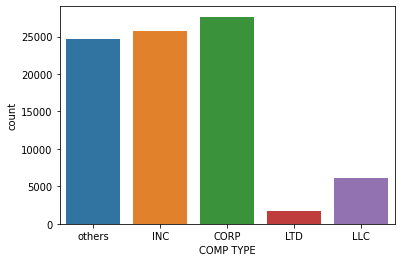

In [733]:
sns.countplot(df1["COMP TYPE"])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



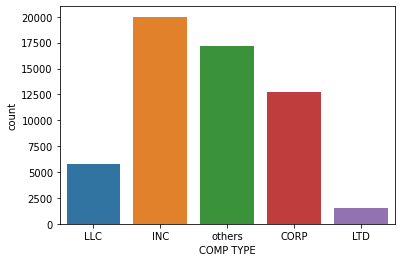

In [734]:
sns.countplot(df2["COMP TYPE"])
plt.show()

In [735]:
list1=["LEGAL NAME","DOING BUSINESS AS NAME"]
df1.drop(list1, axis=1,inplace=True) 
df2.drop(list1, axis=1,inplace=True)

In [736]:
df1.head()

ACCOUNT NUMBER  SITE NUMBER      CITY STATE ZIP CODE  WARD  PRECINCT  \
0           32811            1   CHICAGO    IL  60623.0  22.0      28.0   
1          262311           29   CHICAGO    IL    60618  33.0      23.0   
2          345008            1  HIGHLAND    IL    60035   NaN       NaN   
3          273121            1    LEMONT    IL    60439   NaN       NaN   
4          213785            1  WAUKEGAN    IL    60087   NaN       NaN   

  WARD PRECINCT  POLICE DISTRICT  LICENSE CODE  ... LICENSE STATUS  \
0         22-28             10.0          1010  ...            AAI   
1         33-23             17.0          1315  ...            AAC   
2           NaN              NaN          1011  ...            AAI   
3           NaN              NaN          1010  ...            AAI   
4           NaN              NaN          1010  ...            AAI   

   PAYMENT YEAR APPLICATION CREATED YEAR  \
0        2002.0              2006.421191   
1        2005.0              2006.421191   
2        2009.0              2009.000000   
3        2004.0              2004.000000   
4        2008.0              2006.421191   

  APPLICATION REQUIREMENTS COMPLETE YEAR  LICENSE TERM START YEAR  \
0                                 2002.0                   2002.0   
1                                 2005.0                   2005.0   
2                                 2009.0                   2009.0   
3                                 2004.0                   2004.0   
4                                 2008.0                   2008.0   

   LICENSE TERM EXPIRATION YEAR  LICENSE APPROVED FOR ISSUANCE YEAR  \
0                        2003.0                              2002.0   
1                        2006.0                              2006.0   
2                        2011.0                              2009.0   
3                        2005.0                              2004.0   
4                        2010.0                              2008.0   

  YEAR ISSUED LICENSE STATUS CHANGE YEAR  COMP TYPE  
0        2006                2009.299885     others  
1        2006                2006.000000        INC  
2        2009                2009.299885        INC  
3        2004                2009.299885       CORP  
4        2008                2009.299885     others  

[5 rows x 28 columns]

In [737]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85895 non-null  int64  
 1   SITE NUMBER                             85895 non-null  int64  
 2   CITY                                    85895 non-null  object 
 3   STATE                                   85895 non-null  object 
 4   ZIP CODE                                85864 non-null  object 
 5   WARD                                    36194 non-null  float64
 6   PRECINCT                                29194 non-null  float64
 7   WARD PRECINCT                           36195 non-null  object 
 8   POLICE DISTRICT                         31883 non-null  float64
 9   LICENSE CODE                            85895 non-null  int64  
 10  LICENSE DESCRIPTION                     85895 non-null  ob

In [738]:
latlong=["LATITUDE","LONGITUDE"]
for i in latlong:
 df1[i]=df1[i].fillna(df1[i].mean())
 df2[i]=df2[i].fillna(df2[i].mean())


In [739]:
df1["LONGITUDE"].isnull().sum()

0

In [740]:
u1=df1["LONGITUDE"].nunique()
u2=df2["LONGITUDE"].nunique()
print(u1,u2)

21389 28810


In [741]:
df1["LATITUDE"].isnull().sum()
a=df1["LATITUDE"].nunique()
b=df2["LATITUDE"].nunique()
print(a,b)

21387 28810


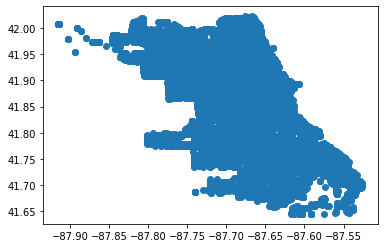

In [742]:
plt.scatter(df1["LONGITUDE"],df1["LATITUDE"])

In [743]:
pd.set_option('display.max_rows',150)
df1["SSA"].unique()

array([25., 60., nan, 14., 28., 45., 24., 10., 13., 35., 27., 17.,  1.,
       26., 34., 54.,  3., 42., 22., 52., 32., 49., 39., 33., 69., 31.,
       62., 50., 23., 56., 21.,  8., 19., 43., 16., 38., 59., 47., 51.,
       18., 29., 20.,  5., 40.,  2., 61., 41., 48.,  4., 55.,  7., 63.,
       64., 44.])

In [744]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df1["SSA"]=lab.fit_transform(df1["SSA"])

In [745]:
pd.set_option('display.max_rows',150)
df1["SSA"].unique()

array([19, 47, 53,  9, 22, 36, 18,  7,  8, 28, 21, 11,  0, 20, 27, 43,  2,
       33, 16, 42, 25, 39, 30, 26, 52, 24, 49, 40, 17, 45, 15,  6, 13, 34,
       10, 29, 46, 37, 41, 12, 23, 14,  4, 31,  1, 48, 32, 38,  3, 44,  5,
       50, 51, 35])

In [746]:
df2["SSA"]=lab.fit_transform(df2["SSA"])

In [747]:
pd.set_option('display.max_rows',150)
df2["SSA"].unique()

array([53, 30, 26, 22, 41, 48, 17, 50, 23, 21, 27, 19, 52, 11, 45, 28, 47,
       15,  7, 40, 34,  1, 35,  8, 24, 46, 38, 33, 39, 29,  3,  6, 43,  0,
        2, 16, 32, 42, 12, 20, 18,  5,  9, 44, 25, 13, 49, 14, 37, 10,  4,
       31, 36, 51])

In [748]:
pd.set_option('display.max_rows',150)
df1["CONDITIONAL APPROVAL"].unique()

array(['N', 'Y'], dtype=object)

In [749]:
df1["CONDITIONAL APPROVAL"]=lab.fit_transform(df1["CONDITIONAL APPROVAL"])

In [750]:
df2["CONDITIONAL APPROVAL"]=lab.fit_transform(df2["CONDITIONAL APPROVAL"])

In [751]:
df2["CONDITIONAL APPROVAL"].unique()

array([0, 1])

In [752]:
df1["APPLICATION TYPE"].unique()

array(['RENEW', 'ISSUE', 'C_LOC', 'C_EXPA', 'C_CAPA'], dtype=object)

In [753]:
df1["APPLICATION TYPE"]=lab.fit_transform(df1["APPLICATION TYPE"])
df2["APPLICATION TYPE"]=lab.fit_transform(df2["APPLICATION TYPE"])

In [754]:
pd.set_option('display.max_rows',1500)
df1["LICENSE NUMBER"].isnull().sum()

1

In [755]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85895 entries, 0 to 85894
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85895 non-null  int64  
 1   SITE NUMBER                             85895 non-null  int64  
 2   CITY                                    85895 non-null  object 
 3   STATE                                   85895 non-null  object 
 4   ZIP CODE                                85864 non-null  object 
 5   WARD                                    36194 non-null  float64
 6   PRECINCT                                29194 non-null  float64
 7   WARD PRECINCT                           36195 non-null  object 
 8   POLICE DISTRICT                         31883 non-null  float64
 9   LICENSE CODE                            85895 non-null  int64  
 10  LICENSE DESCRIPTION                     85895 non-null  ob

In [756]:
df1[df1["LICENSE NUMBER"].isnull()]

ACCOUNT NUMBER  SITE NUMBER      CITY STATE ZIP CODE  WARD  PRECINCT  \
28189          278381            1  NORRIDGE    IL    60706   NaN       NaN   

      WARD PRECINCT  POLICE DISTRICT  LICENSE CODE  ... LICENSE STATUS  \
28189           NaN              NaN          1525  ...            AAC   

       PAYMENT YEAR  APPLICATION CREATED YEAR  \
28189        2004.0                    2004.0   

       APPLICATION REQUIREMENTS COMPLETE YEAR  LICENSE TERM START YEAR  \
28189                                  2004.0                   2004.0   

       LICENSE TERM EXPIRATION YEAR  LICENSE APPROVED FOR ISSUANCE YEAR  \
28189                        2005.0                              2004.0   

      YEAR ISSUED LICENSE STATUS CHANGE YEAR  COMP TYPE  
28189        2004                     2005.0     others  

[1 rows x 28 columns]

In [757]:
df1=df1.drop(index=28189,axis=0)

In [758]:
df1.iloc[28189]

ACCOUNT NUMBER                                              276422
SITE NUMBER                                                      1
CITY                                                   ORLAND PARK
STATE                                                           IL
ZIP CODE                                                     60467
WARD                                                           NaN
PRECINCT                                                       NaN
WARD PRECINCT                                                  NaN
POLICE DISTRICT                                                NaN
LICENSE CODE                                                  1010
LICENSE DESCRIPTION                       Limited Business License
LICENSE NUMBER                                           1491847.0
APPLICATION TYPE                                                 3
CONDITIONAL APPROVAL                                             0
SSA                                                           

In [759]:
df2["LICENSE NUMBER"].isnull().sum()

0

In [760]:
df1["LICENSE NUMBER"].nunique()

49768

LICENSE DESCRIPTION


In [761]:
df1["LICENSE DESCRIPTION"].isna().sum()

0

In [762]:
df1["LICENSE DESCRIPTION"].nunique()

106

In [763]:
df1["LICENSE DESCRIPTION"].value_counts()

Limited Business License                                        50078
Home Repair                                                     10633
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1951
Street Performer                                                 1889
Scavenger, Private                                               1549
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Motor Vehicle Repair : Engine Only (Class II)                     931
Automatic Amusement Device Operator                               773
Peddler, food (fruits and vegtables only)                         582
Mobile Food Dispenser                                             525
Manufacturing Establ

In [764]:
def license_desc(description_name,new_description):
  df1['LICENSE DESCRIPTION'] = df1['LICENSE DESCRIPTION'].replace(description_name, new_description)
  df2['LICENSE DESCRIPTION'] = df2['LICENSE DESCRIPTION'].replace(description_name, new_description)

In [765]:
license_desc('Peddler, non-food, special', 'Peddler')
license_desc('Peddler, food (fruits and vegtables only)', 'Peddler')
license_desc('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
license_desc('Motor Vehicle Repair : Engine Only (Class II)', 'Motor Vehicle Repair')
license_desc('Motor Vehicle Repair: Engine/Body(Class III)', 'Motor Vehicle Repair')
license_desc('Motor Vehicle Repair; Specialty(Class I)', 'Motor Vehicle Repair')
license_desc('Day Care Center Under 2 Years', 'Day Care Center')
license_desc('Day Care Center 2 - 6 Years', 'Day Care Center')
license_desc('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
license_desc('Repossessor Class A', 'Repossessor')
license_desc('Repossessor Class B', 'Repossessor')
license_desc('Repossessor Class B Employee', 'Repossessor')
license_desc('Expediter - Class B', 'Expediter')
license_desc('Expediter - Class A', 'Expediter')
license_desc('Expediter - Class B Employee', 'Expediter')
license_desc('Itinerant Merchant, Class II', 'Itinerant Merchant')
license_desc('Itinerant Merchant, Class I', 'Itinerant Merchant')
license_desc('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
license_desc('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
license_desc('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
license_desc('Single Room Occupancy Class II','Single Room Occupancy')
license_desc('Single Room Occupancy Class I','Single Room Occupancy')

In [766]:
df1["LICENSE DESCRIPTION"].nunique()


92

In [767]:
df1["LICENSE DESCRIPTION"].value_counts()

Limited Business License                                        50078
Home Repair                                                     10633
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1951
Street Performer                                                 1889
Scavenger, Private                                               1549
Motor Vehicle Repair                                             1534
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Peddler                                                           970
Automatic Amusement Device Operator                               773
Mobile Food Dispenser                                             525
Day Care Center     

In [768]:
df2["LICENSE DESCRIPTION"].value_counts()

Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Regulated Business License                                       1089
Day Care Center                                                   730
Manufacturing Establishments                                      639
Peddler, non-food                                                 634
Peddler                                                           574
Massage Therapist                                                 569
Broker              

In [769]:
x=df1["LICENSE DESCRIPTION"].value_counts()<15


In [770]:
a=x[x].index


In [771]:
for i in a:
   df1['LICENSE DESCRIPTION'] = df1['LICENSE DESCRIPTION'].replace(i,'others')
   df2['LICENSE DESCRIPTION'] = df2['LICENSE DESCRIPTION'].replace(i,'others')

In [772]:
df1["LICENSE DESCRIPTION"].value_counts()

Limited Business License                                        50078
Home Repair                                                     10633
Peddler, non-food                                                2812
Home Occupation                                                  2809
Retail Food Establishment                                        2321
Massage Therapist                                                1951
Street Performer                                                 1889
Scavenger, Private                                               1549
Motor Vehicle Repair                                             1534
Hazardous Materials                                              1126
Residential Real Estate Developer                                1087
Peddler                                                           970
Automatic Amusement Device Operator                               773
Mobile Food Dispenser                                             525
Day Care Center     

In [773]:
df2["LICENSE DESCRIPTION"].value_counts()

Limited Business License                                        28094
Retail Food Establishment                                        4788
Home Occupation                                                  3021
Tobacco                                                          2426
others                                                           1945
Home Repair                                                      1860
Motor Vehicle Repair                                             1746
Consumption on Premises - Incidental Activity                    1207
Hazardous Materials                                              1120
Day Care Center                                                   730
Manufacturing Establishments                                      639
Peddler, non-food                                                 634
Peddler                                                           574
Massage Therapist                                                 569
Broker              

In [774]:
df1.isnull().sum()

ACCOUNT NUMBER                                0
SITE NUMBER                                   0
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                      49700
PRECINCT                                  56700
WARD PRECINCT                             49699
POLICE DISTRICT                           54011
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                0
APPLICATION TYPE                              0
CONDITIONAL APPROVAL                          0
SSA                                           0
LATITUDE                                      0
LONGITUDE                                     0
LOCATION                                  47245
LICENSE STATUS                                0
PAYMENT YEAR                                  0
APPLICATION CREATED YEAR                

In [775]:
df1["LICENSE CODE"].nunique()

106

In [776]:
df2["LICENSE CODE"].nunique()

124

In [777]:
df1

ACCOUNT NUMBER  SITE NUMBER            CITY STATE ZIP CODE  WARD  \
0               32811            1         CHICAGO    IL  60623.0  22.0   
1              262311           29         CHICAGO    IL    60618  33.0   
2              345008            1        HIGHLAND    IL    60035   NaN   
3              273121            1          LEMONT    IL    60439   NaN   
4              213785            1        WAUKEGAN    IL    60087   NaN   
...               ...          ...             ...   ...      ...   ...   
85890            8011            1         CHICAGO    IL  60607.0  11.0   
85891          317725            1  MACHESNEY PARK    IL  61115.0   NaN   
85892            8458            2   DOWNERS GROVE    IL  60515.0   NaN   
85893            2156           43         CHICAGO    IL  60632.0  23.0   
85894          205936            1         CHICAGO    IL  60639.0  30.0   

       PRECINCT WARD PRECINCT  POLICE DISTRICT  LICENSE CODE  ...  \
0          28.0         22-28             10.0          1010  ...   
1          23.0         33-23             17.0          1315  ...   
2           NaN           NaN              NaN          1011  ...   
3           NaN           NaN              NaN          1010  ...   
4           NaN           NaN              NaN          1010  ...   
...         ...           ...              ...           ...  ...   
85890      28.0         11-28              1.0          1008  ...   
85891       NaN           NaN              NaN          1800  ...   
85892       NaN           NaN              NaN          1010  ...   
85893       NaN           23-              NaN          1010  ...   
85894      52.0         30-52             25.0          1006  ...   

      LICENSE STATUS  PAYMENT YEAR  APPLICATION CREATED YEAR  \
0                AAI        2002.0               2006.421191   
1                AAC        2005.0               2006.421191   
2                AAI        2009.0               2009.000000   
3                AAI        2004.0               2004.000000   
4                AAI        2008.0               2006.421191   
...              ...           ...                       ...   
85890            AAC        2012.0               2006.421191   
85891            AAI        2007.0               2007.000000   
85892            AAI        2009.0               2006.421191   
85893            AAC        2011.0               2006.421191   
85894            AAC        2004.0               2006.421191   

       APPLICATION REQUIREMENTS COMPLETE YEAR  LICENSE TERM START YEAR  \
0                                      2002.0                   2002.0   
1                                      2005.0                   2005.0   
2                                      2009.0                   2009.0   
3                                      2004.0                   2004.0   
4                                      2008.0                   2008.0   
...                                       ...                      ...   
85890                                  2012.0                   2012.0   
85891                                  2007.0                   2007.0   
85892                                  2008.0                   2009.0   
85893                                  2011.0                   2011.0   
85894                                  2003.0                   2004.0   

       LICENSE TERM EXPIRATION YEAR  LICENSE APPROVED FOR ISSUANCE YEAR  \
0                            2003.0                              2002.0   
1                            2006.0                              2006.0   
2                            2011.0                              2009.0   
3                            2005.0                              2004.0   
4                            2010.0                              2008.0   
...                             ...                                 ...   
85890                        2014.0                              2012.0   
85891              

In [778]:
for i in ["WARD","PRECINCT","WARD PRECINCT","POLICE DISTRICT"] :
  df1[i]=df1[i].fillna(0)
  df2[i]=df2[i].fillna(0)

In [779]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85894 entries, 0 to 85894
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85894 non-null  int64  
 1   SITE NUMBER                             85894 non-null  int64  
 2   CITY                                    85894 non-null  object 
 3   STATE                                   85894 non-null  object 
 4   ZIP CODE                                85863 non-null  object 
 5   WARD                                    85894 non-null  float64
 6   PRECINCT                                85894 non-null  float64
 7   WARD PRECINCT                           85894 non-null  object 
 8   POLICE DISTRICT                         85894 non-null  float64
 9   LICENSE CODE                            85894 non-null  int64  
 10  LICENSE DESCRIPTION                     85894 non-null  ob

In [780]:
df1["WARD"].nunique()

51

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



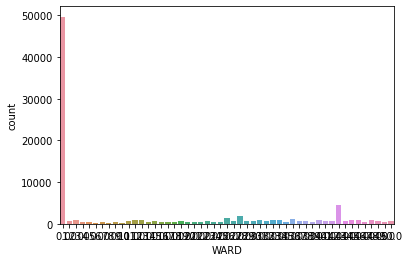

In [781]:
sns.countplot(df1["WARD"])

In [782]:
df2["WARD"].nunique()

51

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



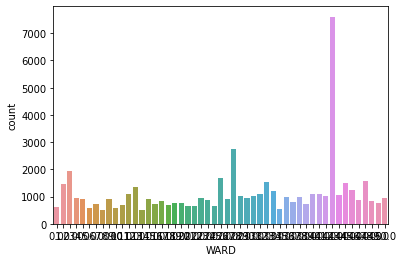

In [783]:
sns.countplot(df2["WARD"])

In [784]:
df1["PRECINCT"].nunique()

77

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



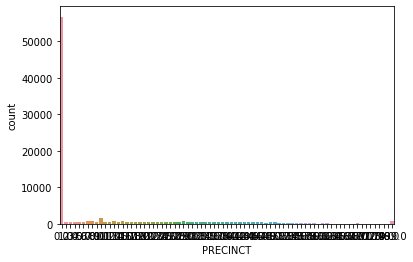

In [785]:
sns.countplot(df1["PRECINCT"])

In [786]:
df2["PRECINCT"].nunique()

77

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



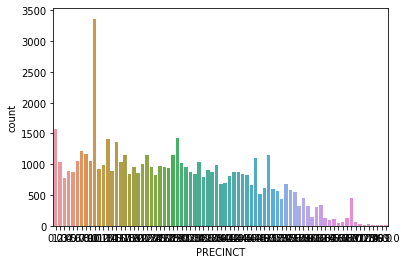

In [787]:
sns.countplot(df2["PRECINCT"])

In [788]:
df1["WARD PRECINCT"].nunique()

2384

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



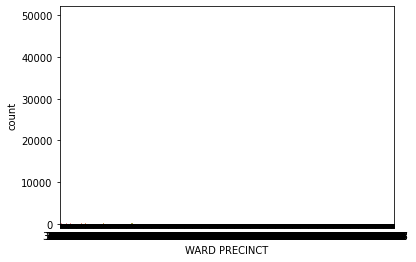

In [789]:
sns.countplot(df1["WARD PRECINCT"])

In [790]:
df2["WARD PRECINCT"].nunique()

2462

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



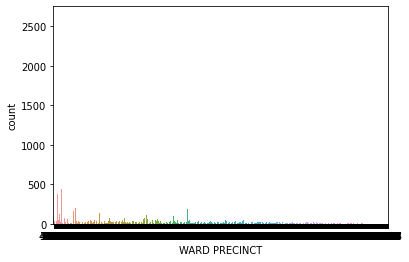

In [791]:
sns.countplot(df2["WARD PRECINCT"])

In [792]:
df1["ZIP CODE"].nunique()

2456

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



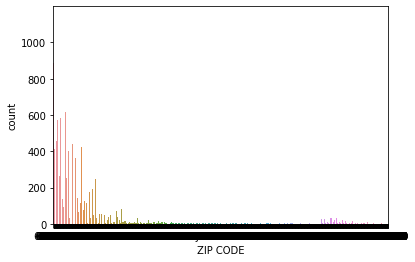

In [793]:
sns.countplot(df1["ZIP CODE"])

In [794]:
df2["ZIP CODE"].nunique()

420

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



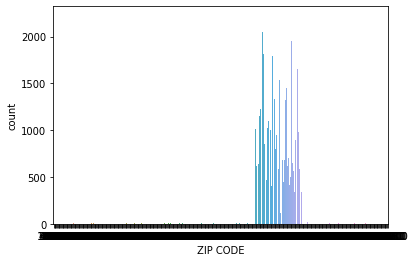

In [795]:
sns.countplot(df2["ZIP CODE"])

In [796]:
df1["POLICE DISTRICT"].nunique()

29

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



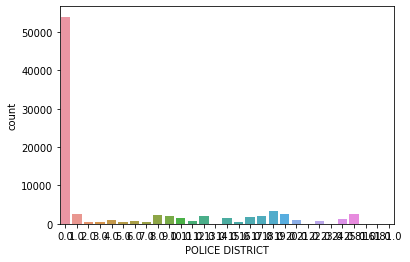

In [797]:
sns.countplot(df1["POLICE DISTRICT"])

In [798]:
df2["POLICE DISTRICT"].nunique()

25

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



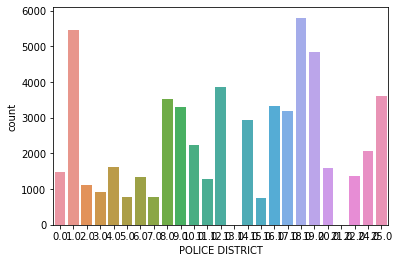

In [799]:
sns.countplot(df2["POLICE DISTRICT"])

In [800]:
for i in ["WARD","PRECINCT","POLICE DISTRICT"] :
   df1[i]=lab.fit_transform(df1[i])
   df2[i]=lab.fit_transform(df2[i])

In [801]:
for i in ["WARD PRECINCT","ZIP CODE"] :
   df1[i]=lab.fit_transform(df1[i].astype(str))
   df2[i]=lab.fit_transform(df2[i].astype(str))

In [802]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85894 entries, 0 to 85894
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85894 non-null  int64  
 1   SITE NUMBER                             85894 non-null  int64  
 2   CITY                                    85894 non-null  object 
 3   STATE                                   85894 non-null  object 
 4   ZIP CODE                                85894 non-null  int64  
 5   WARD                                    85894 non-null  int64  
 6   PRECINCT                                85894 non-null  int64  
 7   WARD PRECINCT                           85894 non-null  int64  
 8   POLICE DISTRICT                         85894 non-null  int64  
 9   LICENSE CODE                            85894 non-null  int64  
 10  LICENSE DESCRIPTION                     85894 non-null  ob

In [803]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          57239 non-null  int64  
 1   SITE NUMBER                             57239 non-null  int64  
 2   CITY                                    57239 non-null  object 
 3   STATE                                   57239 non-null  object 
 4   ZIP CODE                                57239 non-null  int64  
 5   WARD                                    57239 non-null  int64  
 6   PRECINCT                                57239 non-null  int64  
 7   WARD PRECINCT                           57239 non-null  int64  
 8   POLICE DISTRICT                         57239 non-null  int64  
 9   LICENSE CODE                            57239 non-null  int64  
 10  LICENSE DESCRIPTION                     57239 non-null  ob

In [804]:
df1["CITY"].nunique()

1223

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



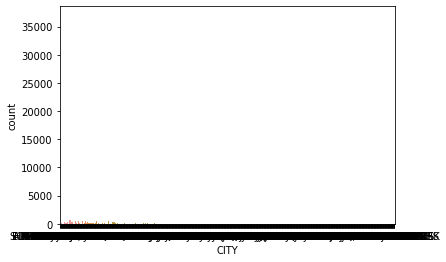

In [805]:
sns.countplot(df1["CITY"])

In [806]:
px.density_contour(df2,df2["CITY"])

In [807]:
df1["STATE"].nunique()

54

In [808]:
px.density_contour(df1,df1["STATE"])

In [809]:
df2["STATE"].nunique()

43

In [810]:
px.density_contour(df2,df2["STATE"])

In [811]:
for i in ["CITY","STATE"] :
  df1[i]=lab.fit_transform(df1[i].astype(str))
  df2[i]=lab.fit_transform(df2[i].astype(str))
  

In [812]:
df1.head()

ACCOUNT NUMBER  SITE NUMBER  CITY  STATE  ZIP CODE  WARD  PRECINCT  \
0           32811            1   193     16      1559    22        28   
1          262311           29   193     16      1548    33        23   
2          345008            1   466     16      1025     0         0   
3          273121            1   585     16      1329     0         0   
4          213785            1  1145     16      1095     0         0   

   WARD PRECINCT  POLICE DISTRICT  LICENSE CODE  ... LICENSE STATUS  \
0            689               10          1010  ...            AAI   
1           1230               17          1315  ...            AAC   
2              1                0          1011  ...            AAI   
3              1                0          1010  ...            AAI   
4              1                0          1010  ...            AAI   

   PAYMENT YEAR  APPLICATION CREATED YEAR  \
0        2002.0               2006.421191   
1        2005.0               2006.421191   
2        2009.0               2009.000000   
3        2004.0               2004.000000   
4        2008.0               2006.421191   

   APPLICATION REQUIREMENTS COMPLETE YEAR  LICENSE TERM START YEAR  \
0                                  2002.0                   2002.0   
1                                  2005.0                   2005.0   
2                                  2009.0                   2009.0   
3                                  2004.0                   2004.0   
4                                  2008.0                   2008.0   

   LICENSE TERM EXPIRATION YEAR  LICENSE APPROVED FOR ISSUANCE YEAR  \
0                        2003.0                              2002.0   
1                        2006.0                              2006.0   
2                        2011.0                              2009.0   
3                        2005.0                              2004.0   
4                        2010.0                              2008.0   

  YEAR ISSUED LICENSE STATUS CHANGE YEAR  COMP TYPE  
0        2006                2009.299885     others  
1        2006                2006.000000        INC  
2        2009                2009.299885        INC  
3        2004                2009.299885       CORP  
4        2008                2009.299885     others  

[5 rows x 28 columns]

In [813]:
df2.head()

ACCOUNT NUMBER  SITE NUMBER  CITY  STATE  ZIP CODE  WARD  PRECINCT  \
0          280120            1    59     13       255    42        67   
1           65043            1    59     13       280    16         5   
2          281270            1    59     13       250     4         8   
3          335243            1    59     13       311     9        33   
4          283018            3    59     13       276    15        26   

   WARD PRECINCT  POLICE DISTRICT  LICENSE CODE  ...  \
0           1771               18          1020  ...   
1            339                7          1010  ...   
2           1624                1          1020  ...   
3           2430                5          1607  ...   
4            278                9          1010  ...   

                                            LOCATION  PAYMENT YEAR  \
0  {'latitude': '41.89004724888915', 'longitude':...        2012.0   
1  {'latitude': '41.786485235679486', 'longitude'...        2012.0   
2  {'latitude': '41.86826924843568', 'longitude':...        2004.0   
3  {'latitude': '41.65576175146191', 'longitude':...        2010.0   
4  {'latitude': '41.81696910012824', 'longitude':...        2007.0   

   APPLICATION CREATED YEAR  APPLICATION REQUIREMENTS COMPLETE YEAR  \
0               2008.471862                                  2011.0   
1               2008.471862                                  2011.0   
2               2008.471862                                  2004.0   
3               2008.471862                                  2010.0   
4               2008.471862                                  2007.0   

   LICENSE TERM START YEAR  LICENSE TERM EXPIRATION YEAR  \
0                   2012.0                        2014.0   
1                   2011.0                        2013.0   
2                   2004.0                        2005.0   
3                   2010.0                        2012.0   
4                   2007.0                        2009.0   

   LICENSE APPROVED FOR ISSUANCE YEAR YEAR ISSUED  LICENSE STATUS CHANGE YEAR  \
0                         2012.000000        2012                 2012.000000   
1                         2012.000000        2012                 2012.000000   
2                         2004.000000        2004                 2011.412791   
3                         2008.378163        2010                 2012.000000   
4                         2007.000000        2007                 2008.000000   

   COMP TYPE  
0        LLC  
1        INC  
2        LLC  
3     others  
4       CORP  

[5 rows x 27 columns]

In [814]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85894 entries, 0 to 85894
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85894 non-null  int64  
 1   SITE NUMBER                             85894 non-null  int64  
 2   CITY                                    85894 non-null  int64  
 3   STATE                                   85894 non-null  int64  
 4   ZIP CODE                                85894 non-null  int64  
 5   WARD                                    85894 non-null  int64  
 6   PRECINCT                                85894 non-null  int64  
 7   WARD PRECINCT                           85894 non-null  int64  
 8   POLICE DISTRICT                         85894 non-null  int64  
 9   LICENSE CODE                            85894 non-null  int64  
 10  LICENSE DESCRIPTION                     85894 non-null  ob

In [815]:
for i in ["LICENSE DESCRIPTION","COMP TYPE"]:
  df1[i]=lab.fit_transform(df1[i].astype(str))
  df2[i]=lab.fit_transform(df2[i].astype(str))

In [816]:
df1.drop("LOCATION",axis=1,inplace=True)

In [817]:
df2.drop("LOCATION",axis=1,inplace=True)

In [818]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85894 entries, 0 to 85894
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85894 non-null  int64  
 1   SITE NUMBER                             85894 non-null  int64  
 2   CITY                                    85894 non-null  int64  
 3   STATE                                   85894 non-null  int64  
 4   ZIP CODE                                85894 non-null  int64  
 5   WARD                                    85894 non-null  int64  
 6   PRECINCT                                85894 non-null  int64  
 7   WARD PRECINCT                           85894 non-null  int64  
 8   POLICE DISTRICT                         85894 non-null  int64  
 9   LICENSE CODE                            85894 non-null  int64  
 10  LICENSE DESCRIPTION                     85894 non-null  in

In [819]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          57239 non-null  int64  
 1   SITE NUMBER                             57239 non-null  int64  
 2   CITY                                    57239 non-null  int64  
 3   STATE                                   57239 non-null  int64  
 4   ZIP CODE                                57239 non-null  int64  
 5   WARD                                    57239 non-null  int64  
 6   PRECINCT                                57239 non-null  int64  
 7   WARD PRECINCT                           57239 non-null  int64  
 8   POLICE DISTRICT                         57239 non-null  int64  
 9   LICENSE CODE                            57239 non-null  int64  
 10  LICENSE DESCRIPTION                     57239 non-null  in

In [820]:
df1["LICENSE STATUS"].unique()

array(['AAI', 'AAC', 'REV', 'REA', 'INQ'], dtype=object)

In [826]:
df1["LICENSE STATUS"]=df1["LICENSE STATUS"].replace("AAI",1)
df1["LICENSE STATUS"]=df1["LICENSE STATUS"].replace("AAC",0)
df1["LICENSE STATUS"]=df1["LICENSE STATUS"].replace("REV",4)
df1["LICENSE STATUS"]=df1["LICENSE STATUS"].replace("REA",3)
df1["LICENSE STATUS"]=df1["LICENSE STATUS"].replace("INQ",2)

In [827]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85894 entries, 0 to 85894
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          85894 non-null  int64  
 1   SITE NUMBER                             85894 non-null  int64  
 2   CITY                                    85894 non-null  int64  
 3   STATE                                   85894 non-null  int64  
 4   ZIP CODE                                85894 non-null  int64  
 5   WARD                                    85894 non-null  int64  
 6   PRECINCT                                85894 non-null  int64  
 7   WARD PRECINCT                           85894 non-null  int64  
 8   POLICE DISTRICT                         85894 non-null  int64  
 9   LICENSE CODE                            85894 non-null  int64  
 10  LICENSE DESCRIPTION                     85894 non-null  in

In [828]:
df1["LICENSE STATUS"].unique()

array([1, 0, 4, 3, 2])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



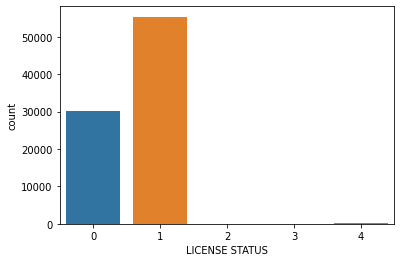

In [833]:
sns.countplot(df1["LICENSE STATUS"])

In [835]:
px.histogram(df1,x=df1["LICENSE STATUS"])

In [836]:
AAC=df1[df1["LICENSE STATUS"]==0]
AAI=df1[df1["LICENSE STATUS"]==1]
INQ=df1[df1["LICENSE STATUS"]==2]
REA=df1[df1["LICENSE STATUS"]==3]
REV=df1[df1["LICENSE STATUS"]==4]

In [840]:
AAC.shape,AAI.shape,INQ.shape,REA.shape,REV.shape

((30199, 27), (55400, 27), (2, 27), (3, 27), (290, 27))

In [854]:
no_sample=REV["LICENSE STATUS"].size

In [855]:
no_sample

290

In [857]:
new_REA=REA.sample(no_sample,replace=True)
new_INQ=INQ.sample(no_sample,replace=True)
new_AAI=AAI.sample(no_sample)
new_AAC=AAC.sample(no_sample)
new_REV=REV.sample(no_sample)

In [859]:
new_df=pd.concat([new_AAC,new_AAI,new_INQ,new_REA,new_REV],axis=0)

In [861]:
new_df.head()

ACCOUNT NUMBER  SITE NUMBER  CITY  STATE  ZIP CODE  WARD  PRECINCT  \
72282          343620            1   193     16      1597    29        34   
78350           68512            1   193     16      1547    10         0   
61005          257839            2   193     16      1621    44        39   
61093          377874            1   193     16      1566    21        47   
32608          313075            1   101     16      1331     0         0   

       WARD PRECINCT  POLICE DISTRICT  LICENSE CODE  ...  LICENSE STATUS  \
72282           1021               15          1010  ...               0   
78350             51                4          1010  ...               0   
61005           1810               19          1010  ...               0   
61093            640               22          1605  ...               0   
32608              1                0          1011  ...               0   

       PAYMENT YEAR  APPLICATION CREATED YEAR  \
72282        2009.0               2009.000000   
78350        2012.0               2006.421191   
61005        2011.0               2006.421191   
61093        2012.0               2012.000000   
32608        2011.0               2006.421191   

       APPLICATION REQUIREMENTS COMPLETE YEAR  LICENSE TERM START YEAR  \
72282                                  2009.0                   2009.0   
78350                                  2012.0                   2012.0   
61005                                  2010.0                   2011.0   
61093                                  2012.0                   2012.0   
32608                                  2009.0                   2010.0   

       LICENSE TERM EXPIRATION YEAR  LICENSE APPROVED FOR ISSUANCE YEAR  \
72282                        2011.0                         2009.000000   
78350                        2014.0                         2012.000000   
61005                        2013.0                         2011.000000   
61093                        2015.0                         2007.069476   
32608                        2012.0                         2011.000000   

       YEAR ISSUED  LICENSE STATUS CHANGE YEAR  COMP TYPE  
72282         2009                      2009.0          4  
78350         2012                      2012.0          1  
61005         2011                      2012.0          1  
61093         2012                      2012.0          4  
32608         2011                      2011.0          2  

[5 rows x 27 columns]

In [863]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 72282 to 22742
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   ACCOUNT NUMBER                          1450 non-null   int64  
 1   SITE NUMBER                             1450 non-null   int64  
 2   CITY                                    1450 non-null   int64  
 3   STATE                                   1450 non-null   int64  
 4   ZIP CODE                                1450 non-null   int64  
 5   WARD                                    1450 non-null   int64  
 6   PRECINCT                                1450 non-null   int64  
 7   WARD PRECINCT                           1450 non-null   int64  
 8   POLICE DISTRICT                         1450 non-null   int64  
 9   LICENSE CODE                            1450 non-null   int64  
 10  LICENSE DESCRIPTION                     1450 non-null  

In [865]:
new_df.shape

(1450, 27)

<function matplotlib.pyplot.plot>

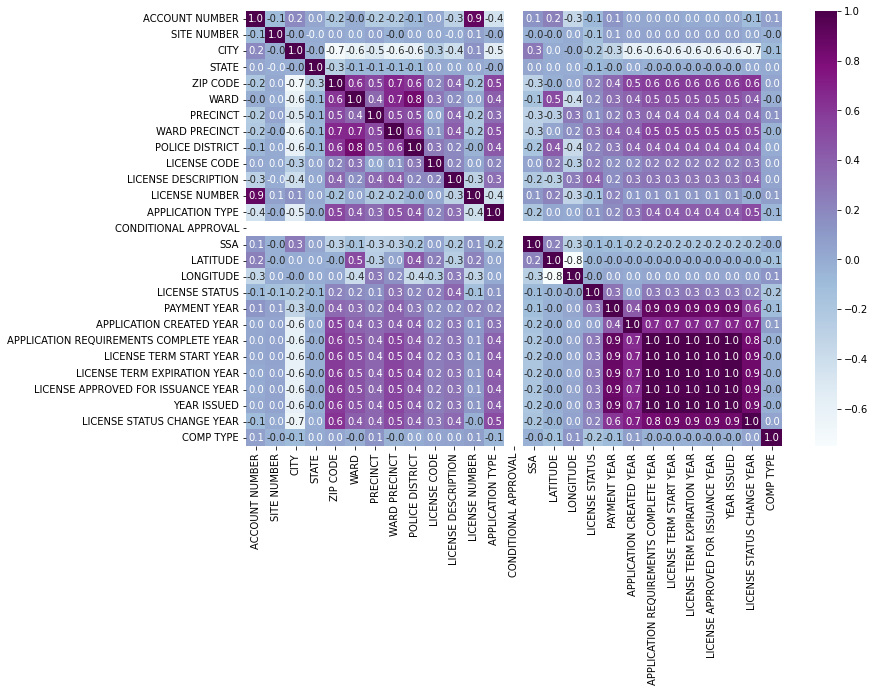

In [876]:
plt.figure(figsize=(12,8))
sns.heatmap(new_df.corr(),annot=True,cmap="BuPu",fmt='.1f')
plt.plot

In [877]:
col_list = ['PAYMENT YEAR', 'APPLICATION REQUIREMENTS COMPLETE YEAR', 'LICENSE APPROVED FOR ISSUANCE YEAR']
new_df1 = new_df.drop(col_list, axis=1)
df2= df2.drop(col_list, axis=1)

<function matplotlib.pyplot.plot>

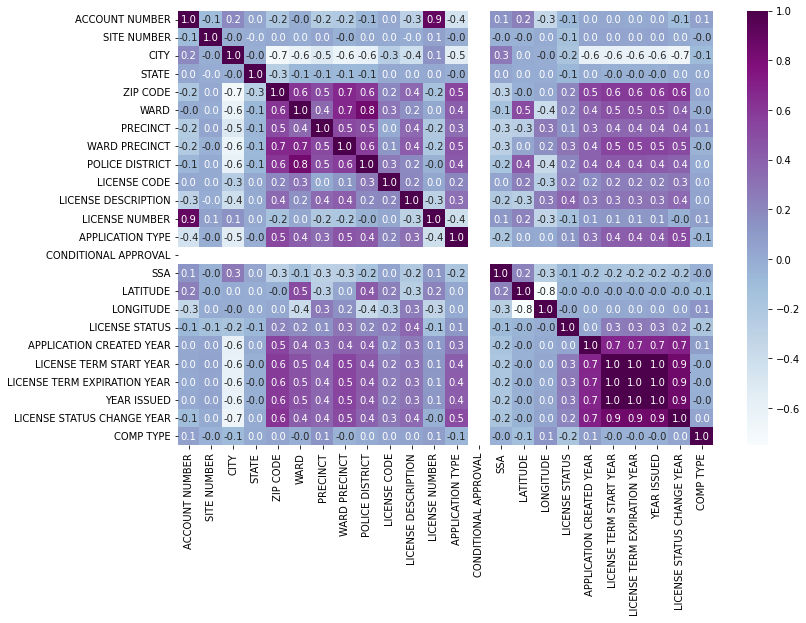

In [878]:
plt.figure(figsize=(12,8))
sns.heatmap(new_df1.corr(),annot=True,cmap="BuPu",fmt='.1f')
plt.plot

In [879]:
X=new_df1.drop("LICENSE STATUS",axis=1)
Y=new_df1["LICENSE STATUS"]

In [880]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.30,random_state=29,stratify=Y) 

In [881]:
xtrain.shape,ytrain.shape

((1015, 23), (1015,))

In [882]:
xtest.shape,ytest.shape

((435, 23), (435,))

# Model training

**Logistic Regression**

In [886]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()
model1.fit(xtrain,ytrain)
model1.score(xtest,ytest)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



0.4413793103448276

<function matplotlib.pyplot.plot>

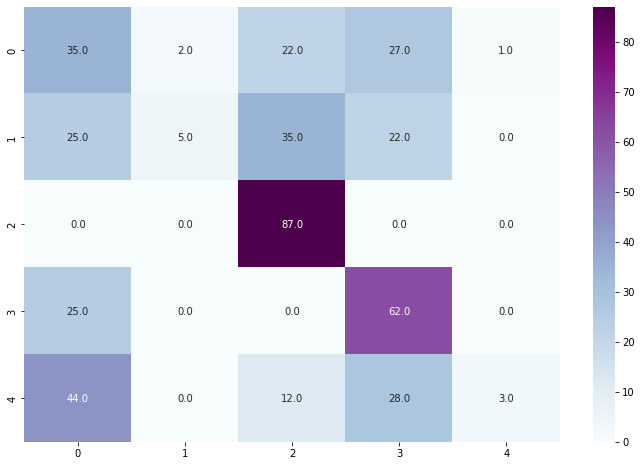

In [889]:
from sklearn.metrics import confusion_matrix , classification_report
mt=confusion_matrix(ytest,model1.predict(xtest))
plt.figure(figsize=(12,8))
sns.heatmap(mt,annot=True,cmap="BuPu",fmt='.1f')
plt.plot

In [891]:
print(classification_report(ytest,model1.predict(xtest)))

              precision    recall  f1-score   support

           0       0.27      0.40      0.32        87
           1       0.71      0.06      0.11        87
           2       0.56      1.00      0.72        87
           3       0.45      0.71      0.55        87
           4       0.75      0.03      0.07        87

    accuracy                           0.44       435
   macro avg       0.55      0.44      0.35       435
weighted avg       0.55      0.44      0.35       435



***DecisionTree***

In [892]:
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier()
model2.fit(xtrain,ytrain)
model2.score(xtest,ytest)

0.8735632183908046

In [893]:
print(classification_report(ytest,model2.predict(xtest)))

              precision    recall  f1-score   support

           0       0.69      0.72      0.71        87
           1       0.91      0.93      0.92        87
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        87
           4       0.77      0.71      0.74        87

    accuracy                           0.87       435
   macro avg       0.87      0.87      0.87       435
weighted avg       0.87      0.87      0.87       435



<function matplotlib.pyplot.plot>

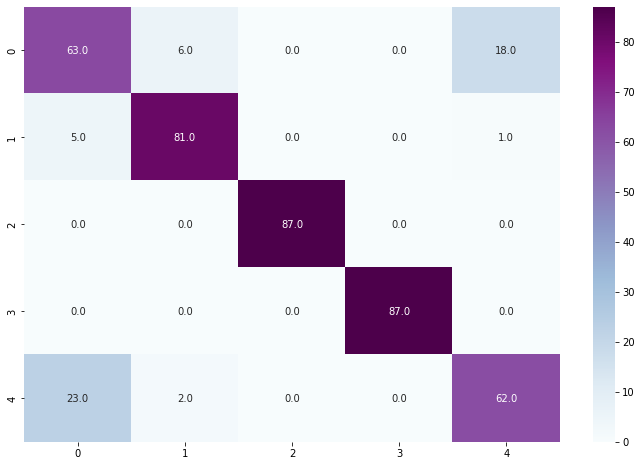

In [894]:
mt=confusion_matrix(ytest,model2.predict(xtest))
plt.figure(figsize=(12,8))
sns.heatmap(mt,annot=True,cmap="BuPu",fmt='.1f')
plt.plot

***RandomForest***

In [905]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(n_estimators=700)
model3.fit(xtrain,ytrain)
model3.score(xtest,ytest)

0.9218390804597701

<function matplotlib.pyplot.plot>

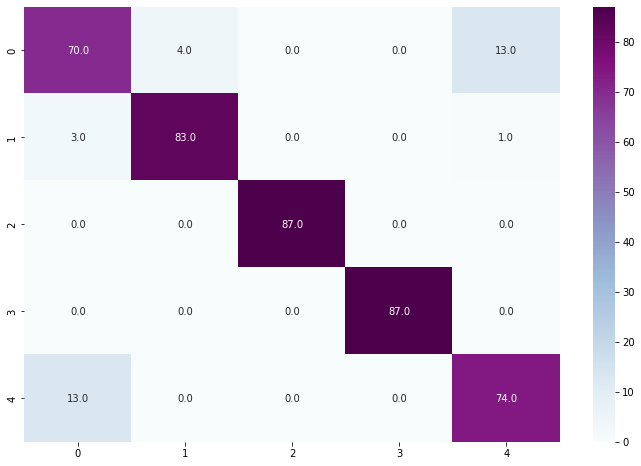

In [906]:
mt=confusion_matrix(ytest,model3.predict(xtest))
plt.figure(figsize=(12,8))
sns.heatmap(mt,annot=True,cmap="BuPu",fmt='.1f')
plt.plot

In [907]:
print(classification_report(ytest,model3.predict(xtest)))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        87
           1       0.95      0.95      0.95        87
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        87
           4       0.84      0.85      0.85        87

    accuracy                           0.92       435
   macro avg       0.92      0.92      0.92       435
weighted avg       0.92      0.92      0.92       435



***SVM***

In [898]:
from sklearn.svm import SVC
model4=SVC()
model4.fit(xtrain,ytrain)
model4.score(xtest,ytest)

0.4827586206896552

<function matplotlib.pyplot.plot>

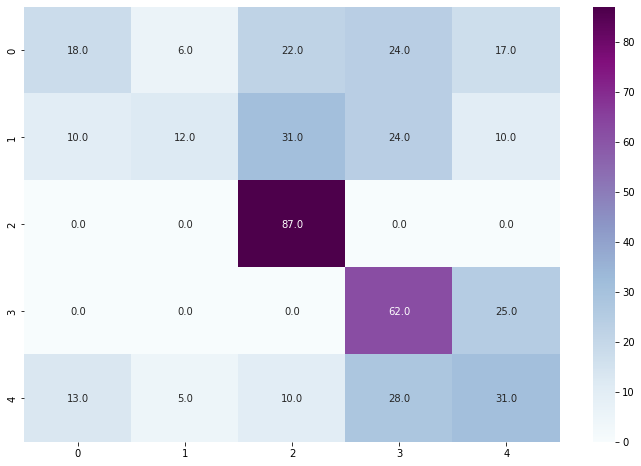

In [900]:
mt=confusion_matrix(ytest,model4.predict(xtest))
plt.figure(figsize=(12,8))
sns.heatmap(mt,annot=True,cmap="BuPu",fmt='.1f')
plt.plot

In [902]:
print(classification_report(ytest,model4.predict(xtest)))

              precision    recall  f1-score   support

           0       0.44      0.21      0.28        87
           1       0.52      0.14      0.22        87
           2       0.58      1.00      0.73        87
           3       0.45      0.71      0.55        87
           4       0.37      0.36      0.36        87

    accuracy                           0.48       435
   macro avg       0.47      0.48      0.43       435
weighted avg       0.47      0.48      0.43       435



***XG Boost*** 

In [917]:
from xgboost import XGBClassifier
model5=XGBClassifier(n_estimators=1000)
model5.fit(xtrain,ytrain)
model5.score(xtest,ytest)

0.9471264367816092

In [919]:
from sklearn.model_selection import RandomizedSearchCV
parameters = {'n_estimators' : [500,1000,1500],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 6]
        }
gd=RandomizedSearchCV(XGBClassifier(),param_distributions=parameters,cv=5)
gd.fit(xtrain,ytrain)

RandomizedSearchCV(cv=5, estimator=XGBClassifier(),
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0.1, 0.5, 1, 1.5, 2, 5],
                                        'max_depth': [3, 5, 6],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [500, 1000, 1500],
                                        'subsample': [0.6, 0.8, 1.0]})

In [920]:
gd.best_estimator_

XGBClassifier(colsample_bytree=0.6, gamma=2, max_depth=5, min_child_weight=5,
              n_estimators=1500, objective='multi:softprob', subsample=0.6)

In [921]:
model6=XGBClassifier(n_estimators=1000,colsample_bytree=0.6, gamma=1, max_depth=6,
              objective='multi:softprob', subsample=1.0)
model6.fit(xtrain,ytrain)
model6.score(xtest,ytest)

0.9402298850574713

In [927]:
print(classification_report(ytest,model5.predict(xtest)))

              precision    recall  f1-score   support

           0       0.86      0.87      0.87        87
           1       1.00      1.00      1.00        87
           2       1.00      1.00      1.00        87
           3       1.00      1.00      1.00        87
           4       0.87      0.86      0.87        87

    accuracy                           0.95       435
   macro avg       0.95      0.95      0.95       435
weighted avg       0.95      0.95      0.95       435



<function matplotlib.pyplot.plot>

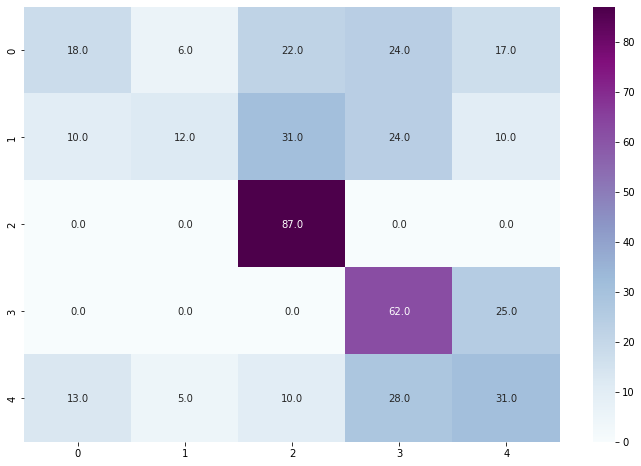

In [928]:
mt=confusion_matrix(ytest,model4.predict(xtest))
plt.figure(figsize=(12,8))
sns.heatmap(mt,annot=True,cmap="BuPu",fmt='.1f')
plt.plot

here we can see clearly  model5 is the best model which is a model5=XGBClassifier(n_estimators=1000)
we will use this model for our predictions

In [922]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57239 entries, 0 to 57238
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ACCOUNT NUMBER                57239 non-null  int64  
 1   SITE NUMBER                   57239 non-null  int64  
 2   CITY                          57239 non-null  int64  
 3   STATE                         57239 non-null  int64  
 4   ZIP CODE                      57239 non-null  int64  
 5   WARD                          57239 non-null  int64  
 6   PRECINCT                      57239 non-null  int64  
 7   WARD PRECINCT                 57239 non-null  int64  
 8   POLICE DISTRICT               57239 non-null  int64  
 9   LICENSE CODE                  57239 non-null  int64  
 10  LICENSE DESCRIPTION           57239 non-null  int64  
 11  LICENSE NUMBER                57239 non-null  float64
 12  APPLICATION TYPE              57239 non-null  int64  
 13  C

In [923]:
predicted=model5.predict(df2)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



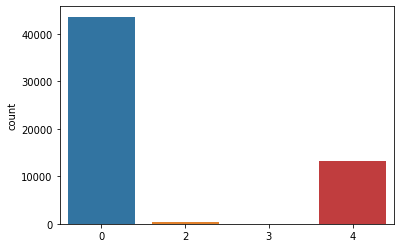

In [929]:
sns.countplot(predicted)

In [930]:
companycheck=pd.DataFrame(predicted,columns=["LICENSE STATUS"])

In [936]:
companycheck["LICENSE STATUS"].unique()

array([0, 4, 2, 3])

In [947]:
companycheck['LICENSE STATUS'] = companycheck['LICENSE STATUS'].replace(1, 'AAI')
companycheck['LICENSE STATUS'] = companycheck['LICENSE STATUS'].replace(0, 'AAC')
companycheck['LICENSE STATUS'] = companycheck['LICENSE STATUS'].replace(4, 'REV')
companycheck['LICENSE STATUS'] = companycheck['LICENSE STATUS'].replace(3, 'REA')
companycheck['LICENSE STATUS'] = companycheck['LICENSE STATUS'].replace(2, 'INQ')

In [948]:
companycheck.to_csv("companycheck.csv",index=False)



```
# This is just for testing
```



In [942]:
ac=new_df1[new_df1["LICENSE STATUS"]==1]

In [943]:
nx=ac.drop("LICENSE STATUS",axis=1)

In [944]:
mx=model5.predict(nx)

In [946]:
mx

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])